In [4]:
import numpy as np 
import pandas as pd 

In [29]:
df=pd.read_csv('/kaggle/input/time-series-cloud-cover-forecasting/train.csv', low_memory=False)

In [8]:
df.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
count,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,480931.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000
mean,203.417447,241.620827,180.002353,12.467373,5.067534,-2.698022,40.327665,23.611655,2.830681,168.190142,817.087196,0.374163,-2.826314,0.061655,0.129371
std,295.831990,369.333659,101.616425,10.578051,6.865294,7.315305,24.050161,34.740024,2.020588,116.355121,5.136720,1.928488,188.916827,0.237741,0.180258
min,-4.764200,-12.403300,0.000120,-16.690000,-17.351000,-24.830000,4.210000,0.000000,0.000000,0.000000,794.918000,0.000000,-7999.000000,0.000000,0.000000
25%,-1.081940,-0.197820,88.578010,4.170000,-0.261000,-8.109000,21.980000,0.000000,1.450000,44.580000,813.989000,0.000000,0.082000,0.000000,0.000000
50%,7.653785,0.266632,179.992330,13.020000,5.363000,-3.119000,33.630000,0.000000,2.450000,177.300000,817.553000,0.000000,0.656000,0.000000,0.000000
75%,351.550500,537.677250,271.428125,20.770000,11.096000,2.668000,53.010000,37.000000,3.700000,282.200000,820.553000,0.000000,1.032000,0.000000,0.201800
max,1428.650000,1069.200000,359.998560,36.320000,19.416000,17.418000,100.100000,100.000000,23.450000,360.000000,847.963000,28.190000,28.430000,1.000000,2.000000


In [9]:
df.count()

DATE (MM/DD)                             482400
MST                                      482400
Global CMP22 (vent/cor) [W/m^2]          482400
Direct sNIP [W/m^2]                      482400
Azimuth Angle [degrees]                  482400
Tower Dry Bulb Temp [deg C]              482400
Tower Wet Bulb Temp [deg C]              482400
Tower Dew Point Temp [deg C]             482400
Tower RH [%]                             482400
Total Cloud Cover [%]                    480931
Peak Wind Speed @ 6ft [m/s]              482400
Avg Wind Direction @ 6ft [deg from N]    482400
Station Pressure [mBar]                  482400
Precipitation (Accumulated) [mm]         482400
Snow Depth [cm]                          482400
Moisture                                 482400
Albedo (CMP11)                           482400
dtype: int64

In [30]:
df=df.iloc[:-30000,:]

In [31]:
df

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.30,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.90,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.80,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.00,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.50,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497035,12-Nov,03:55,-0.971774,-0.696220,90.63494,-4.293,-4.311,-4.411,99.00,0.0,1.20,58.17,811.758,0.0,0.864,1.0,0.0
497036,12-Nov,03:56,-0.979429,-0.720908,90.79298,-4.301,-4.331,-4.431,98.90,0.0,1.20,65.84,811.726,0.0,0.831,1.0,0.0
497037,12-Nov,03:57,-0.992569,-0.760409,90.95064,-4.315,-4.345,-4.445,98.90,0.0,0.95,62.73,811.704,0.0,0.859,1.0,0.0
497038,12-Nov,03:58,-1.005990,-0.785097,91.10793,-4.314,-4.332,-4.432,99.00,0.0,0.95,72.58,811.687,0.0,0.879,1.0,0.0


In [32]:
df['sin(Azimuth)']=np.sin(np.radians(df['Azimuth Angle [degrees]']))
df['cos(Azimuth)']=np.cos(np.radians(df['Azimuth Angle [degrees]']))
df.drop(columns=['Azimuth Angle [degrees]'], inplace=True)

print(df.head())

  DATE (MM/DD)    MST  Global CMP22 (vent/cor) [W/m^2]  Direct sNIP [W/m^2]  \
0       01-Jan  00:00                        -0.962276             0.000000   
1       01-Jan  00:01                        -0.937921             0.000000   
2       01-Jan  00:02                        -0.944395             0.000000   
3       01-Jan  00:03                        -0.951350            -0.029673   
4       01-Jan  00:04                        -0.934976            -0.054401   

   Tower Dry Bulb Temp [deg C]  Tower Wet Bulb Temp [deg C]  \
0                        7.216                        0.988   
1                        7.251                        1.040   
2                        7.256                        1.093   
3                        7.254                        1.060   
4                        7.331                        1.081   

   Tower Dew Point Temp [deg C]  Tower RH [%]  Total Cloud Cover [%]  \
0                        -7.312         32.33                    0.0   
1 

In [33]:
df['DATE (MM/DD)'] = pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%d-%b').fillna(
    pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%b-%d')).dt.dayofyear

df['MST'] = pd.to_datetime(df['MST'], format='%H:%M').dt.hour + pd.to_datetime(df['MST'], format='%H:%M').dt.minute / 60

df['sin(Avg Wind Direction)'] = np.sin(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))
df['cos(Avg Wind Direction)'] = np.cos(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))

df = df.drop(['Avg Wind Direction @ 6ft [deg from N]'], axis=1)

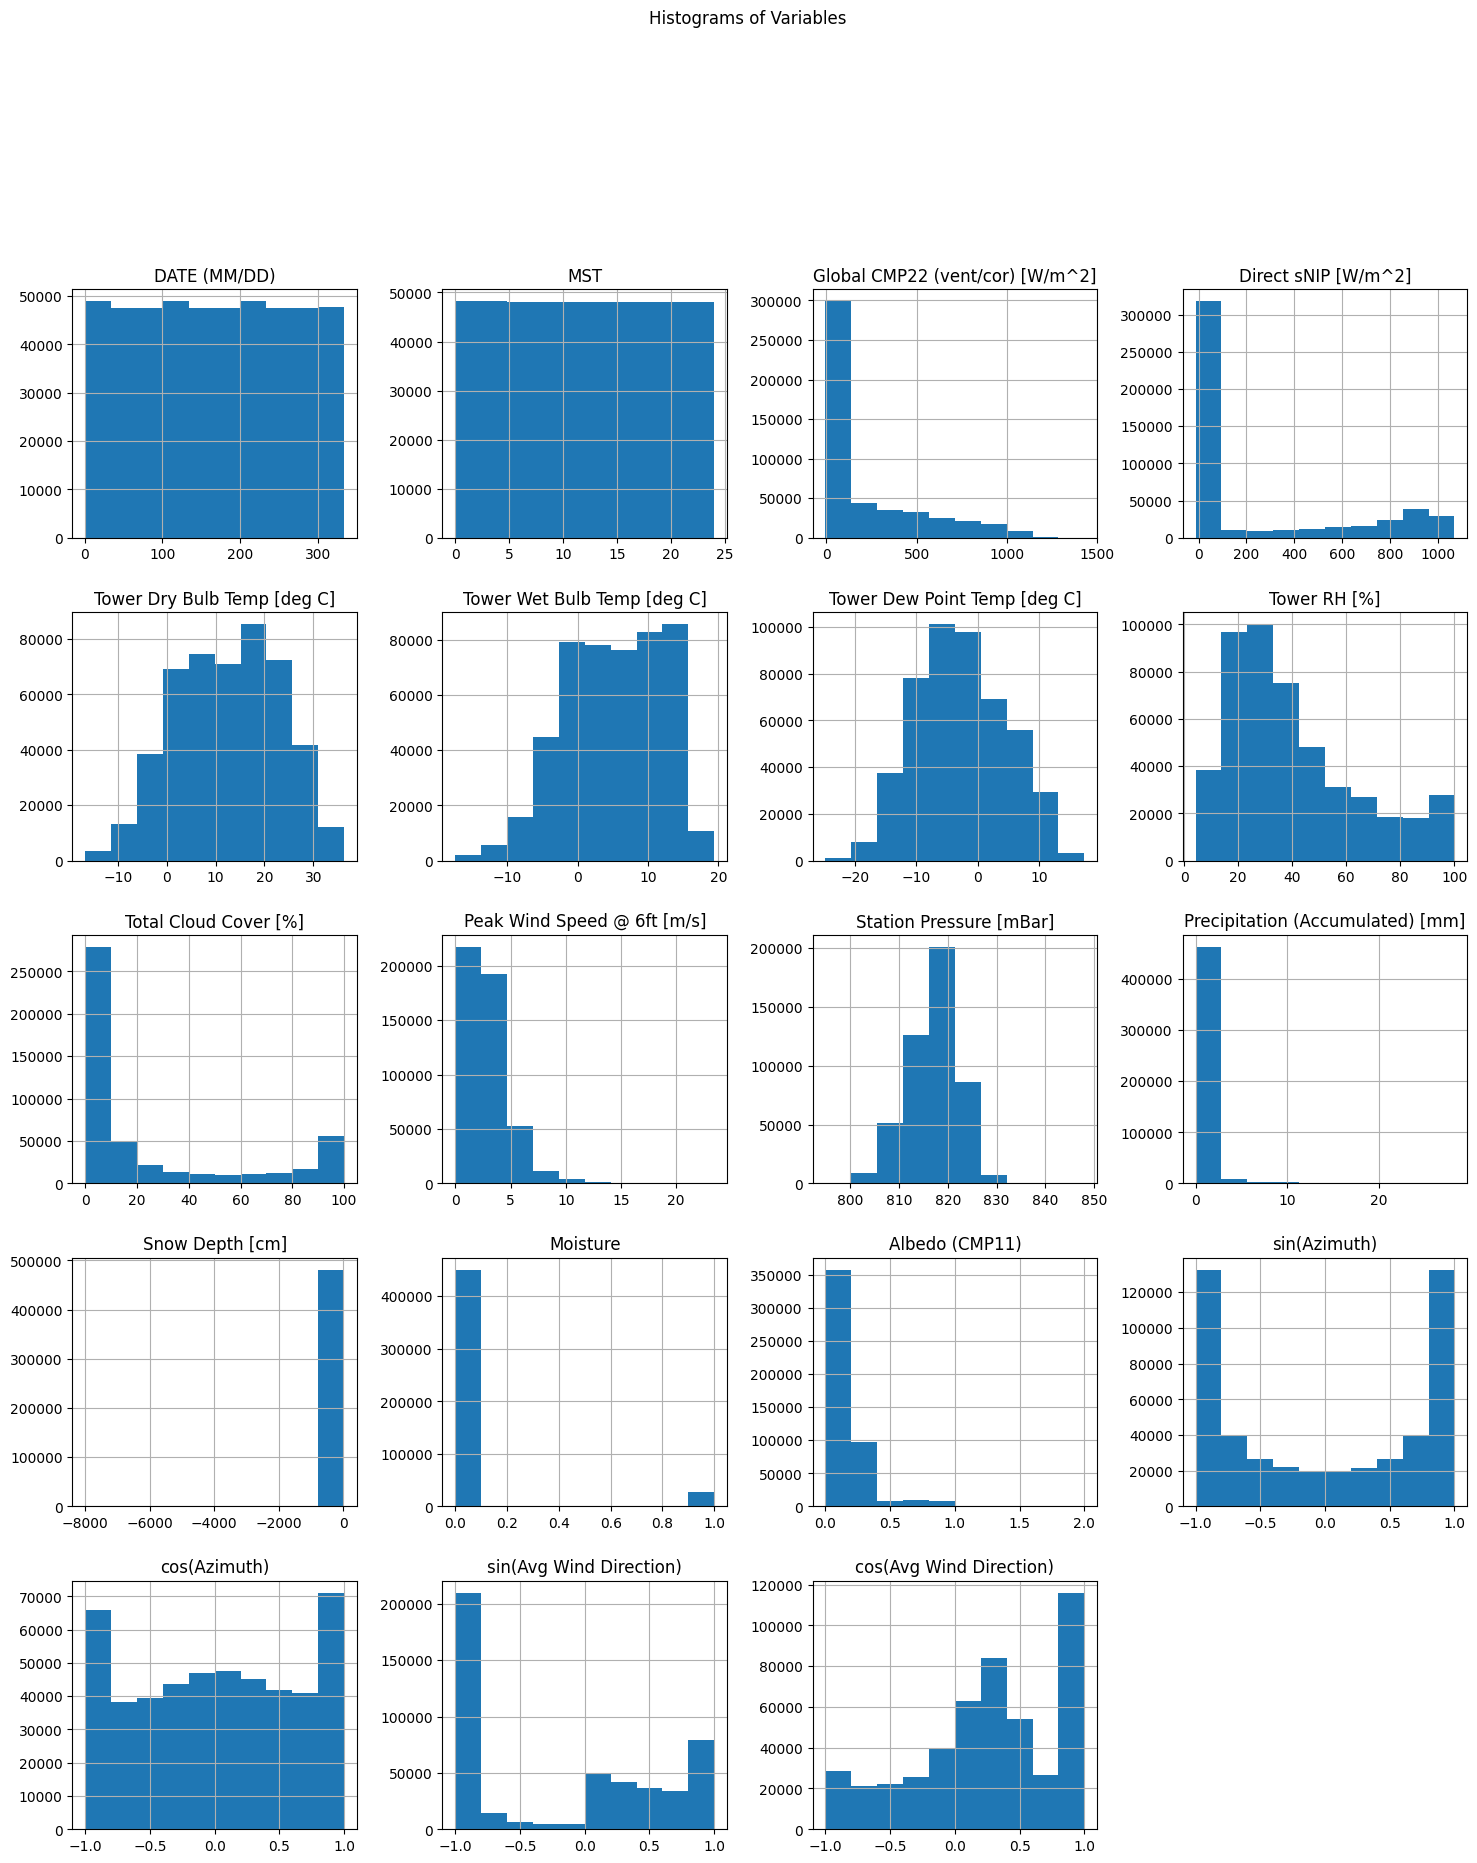

In [34]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(18, 20))
plt.suptitle('Histograms of Variables', y=1.02)
plt.show()


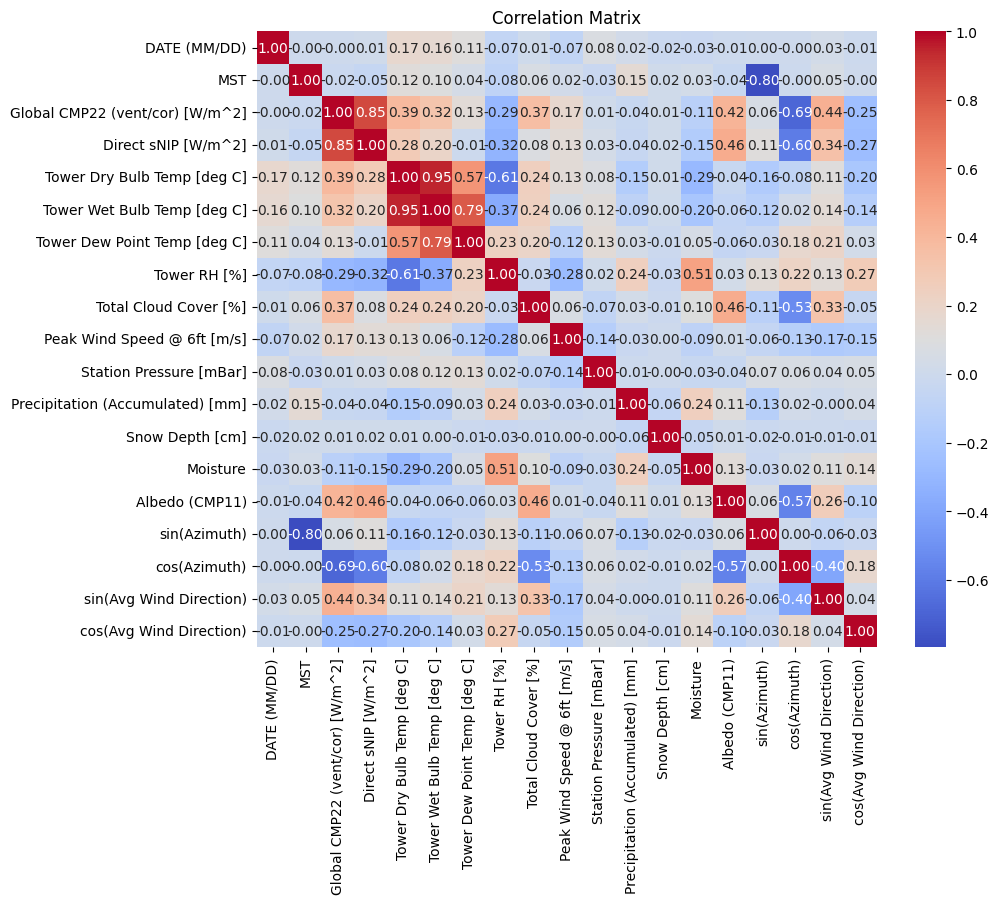

In [35]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:

missing_target_values = df['Total Cloud Cover [%]'].isna().sum()
print(f"Missing values in 'Total Cloud Cover [%]': {missing_target_values}")

Missing values in 'Total Cloud Cover [%]': 17309


In [38]:
df_cleaned = df.dropna(subset=['Total Cloud Cover [%]'])

df_ffill = df_cleaned.fillna(method='ffill')

df_imputed = df_ffill.fillna(method='bfill')

remaining_missing_values = df_imputed.isna().sum()
print("Remaining missing values after forward and backward fill:")
print(remaining_missing_values)

Remaining missing values after forward and backward fill:
DATE (MM/DD)                        0
MST                                 0
Global CMP22 (vent/cor) [W/m^2]     0
Direct sNIP [W/m^2]                 0
Tower Dry Bulb Temp [deg C]         0
Tower Wet Bulb Temp [deg C]         0
Tower Dew Point Temp [deg C]        0
Tower RH [%]                        0
Total Cloud Cover [%]               0
Peak Wind Speed @ 6ft [m/s]         0
Station Pressure [mBar]             0
Precipitation (Accumulated) [mm]    0
Snow Depth [cm]                     0
Moisture                            0
Albedo (CMP11)                      0
sin(Azimuth)                        0
cos(Azimuth)                        0
sin(Avg Wind Direction)             0
cos(Avg Wind Direction)             0
dtype: int64


/tmp/ipykernel_34/342956212.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_cleaned.fillna(method='ffill')
/tmp/ipykernel_34/342956212.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df_ffill.fillna(method='bfill')


In [39]:
X = df_imputed.drop(columns=['Total Cloud Cover [%]'])  # Features
y = df_imputed['Total Cloud Cover [%]']  # Target variable


In [40]:

X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)  # Reshape y to (num_samples, 1)

In [42]:
print(X.shape)
print(y.shape)

(479731, 18)
(479731, 1)


In [108]:
X

array([[ 1.00000000e+00,  0.00000000e+00, -9.62276000e-01, ...,
         9.98495229e-01, -9.99742609e-01,  2.26873336e-02],
       [ 1.00000000e+00,  1.66666667e-02, -9.37921000e-01, ...,
         9.99162603e-01, -9.98719357e-01,  5.05929401e-02],
       [ 1.00000000e+00,  3.33333333e-02, -9.44395000e-01, ...,
         9.99636166e-01, -9.46649260e-01,  3.22265695e-01],
       ...,
       [ 3.16000000e+02,  3.95000000e+00, -9.92569000e-01, ...,
        -1.65910368e-02,  8.88857259e-01,  4.58184213e-01],
       [ 3.16000000e+02,  3.96666667e+00, -1.00599000e+00, ...,
        -1.93358213e-02,  9.54135885e-01,  2.99373867e-01],
       [ 3.16000000e+02,  3.98333333e+00, -1.00004000e+00, ...,
        -2.20738295e-02,  9.33330011e-01,  3.59019624e-01]])

In [44]:
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)


In [45]:
sequence_length = 30  # Window size for LSTM
y_index = [15, 25, 30]  # Indices for 15, 25, 30 minutes predictions

# Create sequences for LSTM
X_seq, y_seq = create_sequences(X, y, sequence_length)

train_size = int(0.9 * len(X_seq))
val_size = test_size = (len(X_seq) - train_size) // 2

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size + val_size], y_seq[train_size:train_size + val_size]
X_test, y_test = X_seq[train_size + val_size:], y_seq[train_size + val_size:]

In [46]:
y_index = [15, 25, 30] 
def reshape_y_for_multiple_predictions(y, indices):
    reshaped_y = []
    for idx in indices:
        reshaped_y.append(y[:, 0].reshape(-1, 1))
    return np.concatenate(reshaped_y, axis=1)

# Reshape y_train, y_val, y_test for 15, 25, 30 minutes predictions
y_train = reshape_y_for_multiple_predictions(y_train, y_index)
y_val = reshape_y_for_multiple_predictions(y_val, y_index)
y_test = reshape_y_for_multiple_predictions(y_test, y_index)


In [47]:
print(y_train.shape,
y_val.shape,
y_test.shape)

(431730, 3) (23985, 3) (23986, 3)


In [109]:
import torch
from torch.utils.data import Dataset, DataLoader

class CloudCoverDataset(Dataset):
    def __init__(self, X, y, window_size=30, forecast_horizons=[15, 25, 30]):
        self.X = X
        self.y = y
        self.window_size = window_size
        self.forecast_horizons = forecast_horizons

    def __len__(self):
        return len(self.X) - self.window_size + 1

    def __getitem__(self, idx):
        start_idx = idx
        end_idx = idx + self.window_size

        X_window = self.X[start_idx:end_idx]
        y_targets = {f"y_{h}": self.y[end_idx + h] for h in self.forecast_horizons}

        return X_window, y_targets

# Assuming X and y are already defined (X.shape = (479731, 18), y.shape = (479731, 1))
dataset = CloudCoverDataset(X, y)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [111]:
dataset

In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import math

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model, 
                                    kernel_size=3, padding=padding, padding_mode='circular')
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight,mode='fan_in',nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1,2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4; hour_size = 24
        weekday_size = 7; day_size = 32; month_size = 13

        Embed = FixedEmbedding if embed_type=='fixed' else nn.Embedding
        if freq=='t':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)
    
    def forward(self, x):
        x = x.long()
        
        minute_x = self.minute_embed(x[:,:,4]) if hasattr(self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:,:,3])
        weekday_x = self.weekday_embed(x[:,:,2])
        day_x = self.day_embed(x[:,:,1])
        month_x = self.month_embed(x[:,:,0])
        
        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h':4, 't':5, 's':6, 'm':1, 'a':1, 'w':2, 'd':3, 'b':3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model)
    
    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type, freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(d_model=d_model, embed_type=embed_type, freq=freq)

        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        # x is expected to be a dictionary with keys "input" and "mark"
        x_input = x["input"]  # Shape [B, L, D]
        x_mark = x["mark"]    # Shape [B, L, additional_features]

        # Apply embeddings
        value_emb = self.value_embedding(x_input)         # Shape [B, L, D_model]
        position_emb = self.position_embedding(x_input)   # Shape [1, L, D_model]
        temporal_emb = self.temporal_embedding(x_mark)    # Shape [B, L, D_model]

        # Combine embeddings
        x = value_emb + position_emb + temporal_emb
        x = self.dropout(x)
        
        return x

In [114]:
class ConvLayer(nn.Module):
    def __init__(self, c_in):
        super(ConvLayer, self).__init__()
        padding = 1 if torch.__version__>='1.5.0' else 2
        self.downConv = nn.Conv1d(in_channels=c_in,
                                  out_channels=c_in,
                                  kernel_size=3,
                                  padding=padding,
                                  padding_mode='circular')
        self.norm = nn.BatchNorm1d(c_in)
        self.activation = nn.ELU()
        self.maxPool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = self.downConv(x.permute(0, 2, 1))
        x = self.norm(x)
        x = self.activation(x)
        x = self.maxPool(x)
        x = x.transpose(1,2)
        return x

class EncoderLayer(nn.Module):
    def __init__(self, attention, d_model, d_ff=None, dropout=0.1, activation="relu"):
        super(EncoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.attention = attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        # x = x + self.dropout(self.attention(
        #     x, x, x,
        #     attn_mask = attn_mask
        # ))
        new_x, attn = self.attention(
            x, x, x,
            attn_mask = attn_mask
        )
        x = x + self.dropout(new_x)

        y = x = self.norm1(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm2(x+y), attn

class Encoder(nn.Module):
    def __init__(self, attn_layers, conv_layers=None, norm_layer=None):
        super(Encoder, self).__init__()
        self.attn_layers = nn.ModuleList(attn_layers)
        self.conv_layers = nn.ModuleList(conv_layers) if conv_layers is not None else None
        self.norm = norm_layer

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        attns = []
        if self.conv_layers is not None:
            for attn_layer, conv_layer in zip(self.attn_layers, self.conv_layers):
                x, attn = attn_layer(x, attn_mask=attn_mask)
                x = conv_layer(x)
                attns.append(attn)
            x, attn = self.attn_layers[-1](x, attn_mask=attn_mask)
            attns.append(attn)
        else:
            for attn_layer in self.attn_layers:
                x, attn = attn_layer(x, attn_mask=attn_mask)
                attns.append(attn)

        if self.norm is not None:
            x = self.norm(x)

        return x, attns

class EncoderStack(nn.Module):
    def __init__(self, encoders, inp_lens):
        super(EncoderStack, self).__init__()
        self.encoders = nn.ModuleList(encoders)
        self.inp_lens = inp_lens

    def forward(self, x, attn_mask=None):
        # x [B, L, D]
        x_stack = []; attns = []
        for i_len, encoder in zip(self.inp_lens, self.encoders):
            inp_len = x.shape[1]//(2**i_len)
            x_s, attn = encoder(x[:, -inp_len:, :])
            x_stack.append(x_s); attns.append(attn)
        x_stack = torch.cat(x_stack, -2)
        
        return x_stack, attns

In [115]:
class DecoderLayer(nn.Module):
    def __init__(self, self_attention, cross_attention, d_model, d_ff=None,
                 dropout=0.1, activation="relu"):
        super(DecoderLayer, self).__init__()
        d_ff = d_ff or 4*d_model
        self.self_attention = self_attention
        self.cross_attention = cross_attention
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = F.relu if activation == "relu" else F.gelu

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        x = x + self.dropout(self.self_attention(
            x, x, x,
            attn_mask=x_mask
        )[0])
        x = self.norm1(x)

        x = x + self.dropout(self.cross_attention(
            x, cross, cross,
            attn_mask=cross_mask
        )[0])

        y = x = self.norm2(x)
        y = self.dropout(self.activation(self.conv1(y.transpose(-1,1))))
        y = self.dropout(self.conv2(y).transpose(-1,1))

        return self.norm3(x+y)

class Decoder(nn.Module):
    def __init__(self, layers, norm_layer=None):
        super(Decoder, self).__init__()
        self.layers = nn.ModuleList(layers)
        self.norm = norm_layer

    def forward(self, x, cross, x_mask=None, cross_mask=None):
        for layer in self.layers:
            x = layer(x, cross, x_mask=x_mask, cross_mask=cross_mask)

        if self.norm is not None:
            x = self.norm(x)

        return x

In [117]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=4c30c2e038299779195de3d318b28ccae462442dd38e269773cc0e1267c95fea
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils
Note: you may need to restart the kernel to use updated packages.


In [121]:
class TriangularCausalMask():
    def __init__(self, B, L, device="cpu"):
        mask_shape = [B, 1, L, L]
        with torch.no_grad():
            self._mask = torch.triu(torch.ones(mask_shape, dtype=torch.bool), diagonal=1).to(device)

    @property
    def mask(self):
        return self._mask

class ProbMask():
    def __init__(self, B, H, L, index, scores, device="cpu"):
        _mask = torch.ones(L, scores.shape[-1], dtype=torch.bool).to(device).triu(1)
        _mask_ex = _mask[None, None, :].expand(B, H, L, scores.shape[-1])
        indicator = _mask_ex[torch.arange(B)[:, None, None],
                             torch.arange(H)[None, :, None],
                             index, :].to(device)
        self._mask = indicator.view(scores.shape).to(device)
    
    @property
    def mask(self):
        return self._mask

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from math import sqrt

class FullAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(FullAttention, self).__init__()
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)
        
    def forward(self, queries, keys, values, attn_mask):
        B, L, H, E = queries.shape
        _, S, _, D = values.shape
        scale = self.scale or 1./sqrt(E)

        scores = torch.einsum("blhe,bshe->bhls", queries, keys)
        if self.mask_flag:
            if attn_mask is None:
                attn_mask = TriangularCausalMask(B, L, device=queries.device)

            scores.masked_fill_(attn_mask.mask, -np.inf)

        A = self.dropout(torch.softmax(scale * scores, dim=-1))
        V = torch.einsum("bhls,bshd->blhd", A, values)
        
        if self.output_attention:
            return (V.contiguous(), A)
        else:
            return (V.contiguous(), None)

class ProbAttention(nn.Module):
    def __init__(self, mask_flag=True, factor=5, scale=None, attention_dropout=0.1, output_attention=False):
        super(ProbAttention, self).__init__()
        self.factor = factor
        self.scale = scale
        self.mask_flag = mask_flag
        self.output_attention = output_attention
        self.dropout = nn.Dropout(attention_dropout)

    def _prob_QK(self, Q, K, sample_k, n_top): # n_top: c*ln(L_q)
        # Q [B, H, L, D]
        B, H, L_K, E = K.shape
        _, _, L_Q, _ = Q.shape

        # calculate the sampled Q_K
        K_expand = K.unsqueeze(-3).expand(B, H, L_Q, L_K, E)
        index_sample = torch.randint(L_K, (L_Q, sample_k)) # real U = U_part(factor*ln(L_k))*L_q
        K_sample = K_expand[:, :, torch.arange(L_Q).unsqueeze(1), index_sample, :]
        Q_K_sample = torch.matmul(Q.unsqueeze(-2), K_sample.transpose(-2, -1)).squeeze(-2)

        # find the Top_k query with sparisty measurement
        M = Q_K_sample.max(-1)[0] - torch.div(Q_K_sample.sum(-1), L_K)
        M_top = M.topk(n_top, sorted=False)[1]

        # use the reduced Q to calculate Q_K
        Q_reduce = Q[torch.arange(B)[:, None, None],
                     torch.arange(H)[None, :, None],
                     M_top, :] # factor*ln(L_q)
        Q_K = torch.matmul(Q_reduce, K.transpose(-2, -1)) # factor*ln(L_q)*L_k

        return Q_K, M_top

    def _get_initial_context(self, V, L_Q):
        B, H, L_V, D = V.shape
        if not self.mask_flag:
            # V_sum = V.sum(dim=-2)
            V_sum = V.mean(dim=-2)
            contex = V_sum.unsqueeze(-2).expand(B, H, L_Q, V_sum.shape[-1]).clone()
        else: # use mask
            assert(L_Q == L_V) # requires that L_Q == L_V, i.e. for self-attention only
            contex = V.cumsum(dim=-2)
        return contex

    def _update_context(self, context_in, V, scores, index, L_Q, attn_mask):
        B, H, L_V, D = V.shape

        if self.mask_flag:
            attn_mask = ProbMask(B, H, L_Q, index, scores, device=V.device)
            scores.masked_fill_(attn_mask.mask, -np.inf)

        attn = torch.softmax(scores, dim=-1) # nn.Softmax(dim=-1)(scores)

        context_in[torch.arange(B)[:, None, None],
                   torch.arange(H)[None, :, None],
                   index, :] = torch.matmul(attn, V).type_as(context_in)
        if self.output_attention:
            attns = (torch.ones([B, H, L_V, L_V])/L_V).type_as(attn).to(attn.device)
            attns[torch.arange(B)[:, None, None], torch.arange(H)[None, :, None], index, :] = attn
            return (context_in, attns)
        else:
            return (context_in, None)

    def forward(self, queries, keys, values, attn_mask):
        B, L_Q, H, D = queries.shape
        _, L_K, _, _ = keys.shape

        queries = queries.transpose(2,1)
        keys = keys.transpose(2,1)
        values = values.transpose(2,1)

        U_part = self.factor * np.ceil(np.log(L_K)).astype('int').item() # c*ln(L_k)
        u = self.factor * np.ceil(np.log(L_Q)).astype('int').item() # c*ln(L_q) 

        U_part = U_part if U_part<L_K else L_K
        u = u if u<L_Q else L_Q
        
        scores_top, index = self._prob_QK(queries, keys, sample_k=U_part, n_top=u) 

        # add scale factor
        scale = self.scale or 1./sqrt(D)
        if scale is not None:
            scores_top = scores_top * scale
        # get the context
        context = self._get_initial_context(values, L_Q)
        # update the context with selected top_k queries
        context, attn = self._update_context(context, values, scores_top, index, L_Q, attn_mask)
        
        return context.transpose(2,1).contiguous(), attn


class AttentionLayer(nn.Module):
    def __init__(self, attention, d_model, n_heads, 
                 d_keys=None, d_values=None, mix=False):
        super(AttentionLayer, self).__init__()

        d_keys = d_keys or (d_model//n_heads)
        d_values = d_values or (d_model//n_heads)

        self.inner_attention = attention
        self.query_projection = nn.Linear(d_model, d_keys * n_heads)
        self.key_projection = nn.Linear(d_model, d_keys * n_heads)
        self.value_projection = nn.Linear(d_model, d_values * n_heads)
        self.out_projection = nn.Linear(d_values * n_heads, d_model)
        self.n_heads = n_heads
        self.mix = mix

    def forward(self, queries, keys, values, attn_mask):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads

        queries = self.query_projection(queries).view(B, L, H, -1)
        keys = self.key_projection(keys).view(B, S, H, -1)
        values = self.value_projection(values).view(B, S, H, -1)

        out, attn = self.inner_attention(
            queries,
            keys,
            values,
            attn_mask
        )
        if self.mix:
            out = out.transpose(2,1).contiguous()
        out = out.view(B, L, -1)

        return self.out_projection(out), attn

In [112]:
for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}:")
    
    # X_batch will be a tensor of shape (batch_size, window_size, num_features)
    print(f"Shape of X_batch: {X_batch.shape}")
    
    # y_batch will be a dictionary where each value is a tensor of shape (batch_size,)
    for key, value in y_batch.items():
        print(f"Shape of {key}: {value.shape}")
    
    # Assuming you want to inspect just the first batch, break after the first iteration
    break

Batch 1:
Shape of X_batch: torch.Size([64, 30, 18])
Shape of y_15: torch.Size([64, 1])
Shape of y_25: torch.Size([64, 1])
Shape of y_30: torch.Size([64, 1])


In [146]:
class Informer(nn.Module):
    def __init__(self, input_dim, output_dim, d_model=64, num_heads=8, num_encoders=2, dropout=0.1):
        super(Informer, self).__init__()

        self.data_embedding = DataEmbedding(c_in=input_dim, d_model=d_model)
        self.encoder_stack = EncoderStack(
            encoders=[Encoder(
                attn_layers=[EncoderLayer(
                    attention=ProbAttention(mask_flag=True, factor=5, scale=None, attention_dropout=dropout, output_attention=False),
                    d_model=d_model,
                    d_ff=4 * d_model,
                    dropout=dropout,
                    activation="gelu"
                ) for _ in range(num_encoders)],
                conv_layers=[ConvLayer(c_in=d_model) for _ in range(num_encoders)],
                norm_layer=None
            ) for _ in range(num_heads)],
            inp_lens=[i+1 for i in range(num_heads)]
        )
        self.fc = nn.Linear(d_model * num_heads, output_dim)

    def forward(self, x):
        # x["input"] has shape [B, L, D]
        x = self.data_embedding(x["input"], x["mark"])  # Assuming data_embedding handles (x["input"], x["mark"])
        x, _ = self.encoder_stack(x)  # Encoder stack expects [B, L, D] input
        x = x.mean(dim=1)  # Global average pooling over the sequence dimension
        return x


In [147]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Informer(input_dim=X.shape[1], output_dim=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

def train(model, dataloader, optimizer, criterion, device):
    model.train()
    train_loss = 0.0

    for batch_idx, (X_window, y_targets) in enumerate(dataloader):
        X_window = X_window.to(device)
        for key in y_targets:
            y_targets[key] = y_targets[key].to(device)

        optimizer.zero_grad()
        outputs = model(X_window)
        loss = sum([criterion(outputs, y_targets[key]) for key in y_targets])
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(dataloader)

In [148]:

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, dataloader, optimizer, criterion, device)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}")

IndexError: too many indices for tensor of dimension 3

In [105]:
model

InformerModel(
  (encoder): InformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x InformerEncoderLayer(
        (self_attn): ProbSparseSelfAttention(
          (q_linear): Linear(in_features=512, out_features=512, bias=True)
          (k_linear): Linear(in_features=512, out_features=512, bias=True)
          (v_linear): Linear(in_features=512, out_features=512, bias=True)
          (fc): Linear(in_features=512, out_features=512, bias=True)
        )
        (ffn): Sequential(
          (0): Linear(in_features=512, out_features=2048, bias=True)
          (1): ReLU()
          (2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (layernorm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (layernorm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.05, inplace=False)
      )
    )
  )
  (decoder): InformerDecoder(
    (layers): ModuleList(
      (0): InformerDecoderLayer(
        (self_attn): ProbSparseSel

In [98]:

from sklearn.metrics import r2_score, mean_absolute_error

In [106]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, inputs[:, -1:, :])
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss, val_r2, val_mae = evaluate_model(model, val_loader, criterion)
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss:.4f}, '
              f'Val R2: {val_r2:.4f}, '
              f'Val MAE: {val_mae:.4f}')

In [99]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val_loss = 0.0
    all_targets = []
    all_outputs = []
    
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs, inputs[:, -1:, :])
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            all_targets.append(targets.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    
    all_targets = np.concatenate(all_targets, axis=0)
    all_outputs = np.concatenate(all_outputs, axis=0)
    val_r2 = r2_score(all_targets, all_outputs, multioutput='uniform_average')
    val_mae = mean_absolute_error(all_targets, all_outputs)
    
    return val_loss / len(data_loader), val_r2, val_mae

In [107]:

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



# Assuming you have already defined train_loader, val_loader, criterion, and optimizer
# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x18 and 3x512)

In [100]:
input_dim = X.shape[1]  # Adjust as per your input dimension
output_dim = len(y_indices)  # Number of predictions (3 for 15, 25, 30 minutes)
seq_length = 30
model = InformerModel(input_dim, output_dim, seq_length)

In [ ]:

test_loss, test_r2, test_mae = evaluate_model(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}, Test R2: {test_r2:.4f}, Test MAE: {test_mae:.4f}')

In [101]:
# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x18 and 3x512)

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from informers import Informer

class InformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, seq_length):
        super(InformerModel, self).__init__()
        self.informer = Informer(enc_in=input_dim, dec_in=input_dim, c_out=output_dim,
                                 seq_len=seq_length, label_len=seq_length, out_len=output_dim,
                                 factor=5, d_model=512, n_heads=8, e_layers=2, d_layers=1,
                                 d_ff=2048, dropout=0.05, attn='prob', activation='gelu',
                                 output_attention=False, distil=True, mix=True,
                                 device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    def forward(self, x_enc, x_dec):
        return self.informer(x_enc, x_dec)

# Initialize model
input_dim = X.shape[1]
output_dim = 3  # Predicting 3 time points
model = InformerModel(input_dim, output_dim, seq_length).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


ModuleNotFoundError: No module named 'informers'

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Training function
def train_model(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, inputs[:, -1:, :])
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        val_loss, val_r2, val_mae = evaluate_model(model, val_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss:.4f}, '
              f'Val R2: {val_r2:.4f}, '
              f'Val MAE: {val_mae:.4f}')
    
    return model

# Evaluation function
def evaluate_model(model, data_loader):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    val_loss = 0.0
    all_targets = []
    all_outputs = []
    
    criterion = nn.MSELoss()
    
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs, inputs[:, -1:, :])
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            all_targets.append(targets.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    
    all_targets = np.concatenate(all_targets, axis=0)
    all_outputs = np.concatenate(all_outputs, axis=0)
    val_r2 = r2_score(all_targets, all_outputs, multioutput='uniform_average')
    val_mae = mean_absolute_error(all_targets, all_outputs)
    
    return val_loss / len(data_loader), val_r2, val_mae

# Train model
trained_model = train_model(model, train_loader, val_loader)


In [ ]:
# Evaluate on test data
test_loss, test_r2, test_mae = evaluate_model(trained_model, test_loader)
print(f'Test Loss: {test_loss:.4f}, Test R2: {test_r2:.4f}, Test MAE: {test_mae:.4f}')
